Solution For - https://www.kaggle.com/c/bike-sharing-demand/data

**Data Fields**

1. **datetime** - hourly date + timestamp  
2. **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
3. **holiday** - whether the day is considered a holiday
4. **workingday** - whether the day is neither a weekend nor holiday
5. **weather** - 
    1. Clear, Few clouds, Partly cloudy, Partly cloudy 
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
6. **temp** - temperature in Celsius
7. **atemp** - "feels like" temperature in Celsius
8. **humidity** - relative humidity
9. **windspeed** - wind speed
10. **casual** - number of non-registered user rentals initiated
11. **registered** - number of registered user rentals initiated
12. **count** - number of total rentals

In [2]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
# import train and test data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#rename count to total
train.rename(columns={'count' : 'total'}, inplace=True)
test.rename(columns={'count' : 'total'}, inplace=True)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Get basic informtion about the data

print train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
total         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
None


In [5]:
# Basic data Statistics
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c63aed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11eee4c10>]], dtype=object)

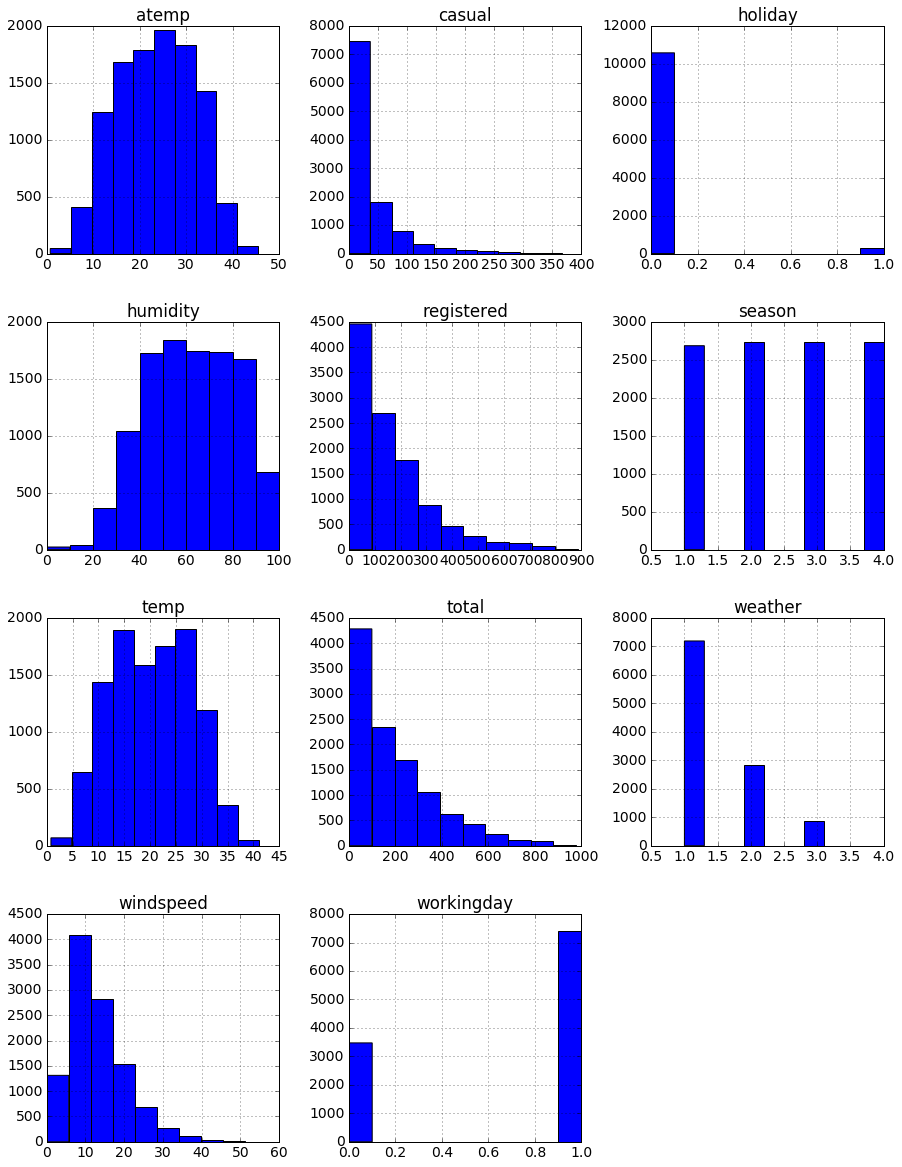

In [6]:
# Visualization
# Univariate Analysis

train.hist(figsize=(15,20))

**Inferences**
1. atemp and temp and windspeed are more or less naturally distrubuted.
2. more data for not holiday.
3. Equal data for all season. Good
4. total is skewed. Can look for ways to make is normally distrubuted
5. More data for clear weather.

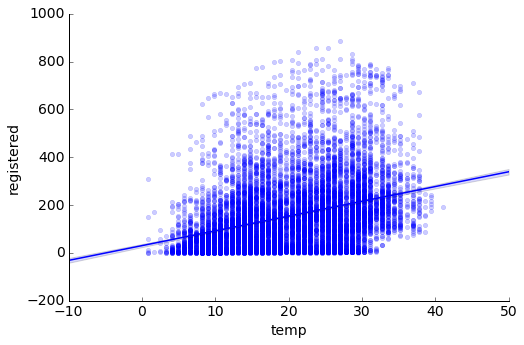

In [10]:
# Bivariate Analysis
# temp and count
sns.lmplot(x='temp',y='registered', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

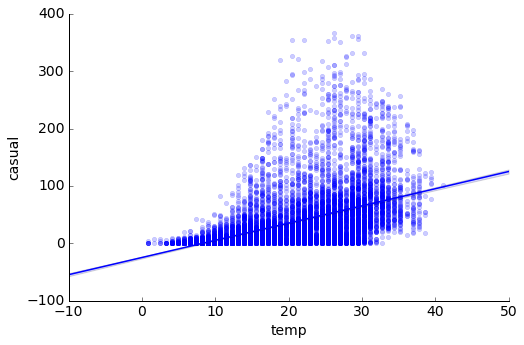

In [11]:
sns.lmplot(x='temp',y='casual', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

**Inference**

It seems there is a favorable temperature when people rent cycle - around 20 to 30.

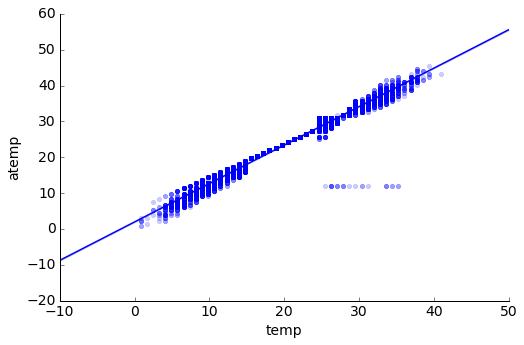

In [7]:
# temp and atemp
# Expected - linear relation. as feel like temperature will be highly dependent on actual temperature

sns.lmplot(x='temp',y='atemp', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

As expected, temp and atemp are linealy co-related. But there are some examples when feel like temperature is less than actual temperature. It might be because of wind. Might look to see the reason. Need to look.

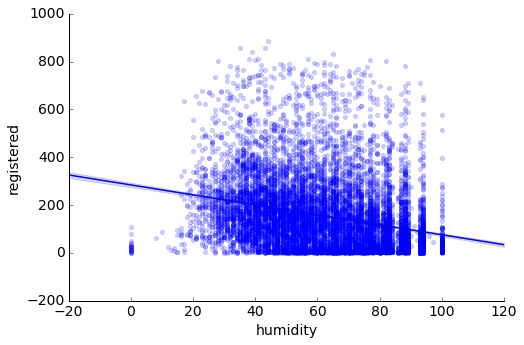

In [12]:
# humidity and count

sns.lmplot(x='humidity',y='registered', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

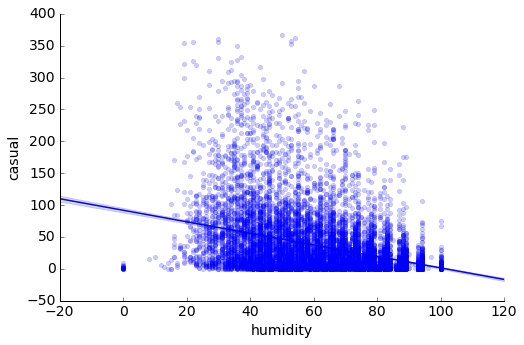

In [13]:
sns.lmplot(x='humidity',y='casual', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

**Inference**
As humidity increase there is decreaase in bike rental

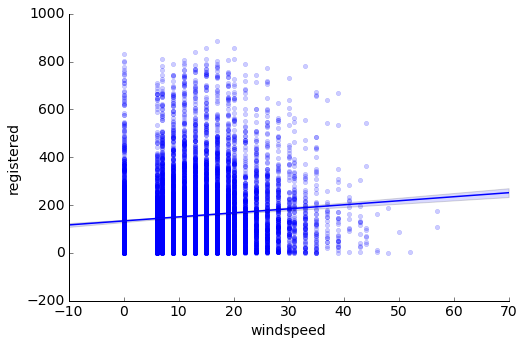

In [14]:
# windspeed and count

sns.lmplot(x='windspeed',y='registered', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

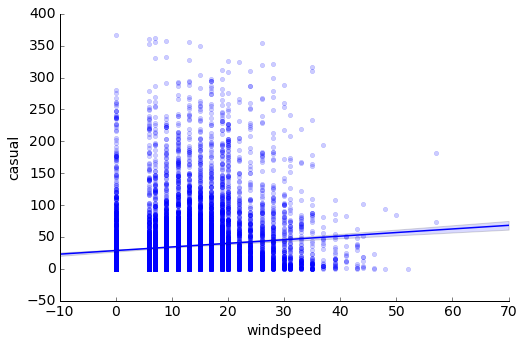

In [15]:
sns.lmplot(x='windspeed',y='casual', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

**Inference**

It seems people do not prefer renting bike on windy day. 

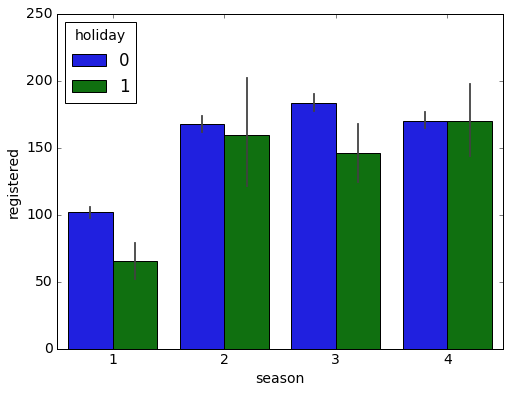

In [16]:
# plotting with categorical data

# season and total

sns.barplot(x="season", y="registered", hue="holiday", data=train)

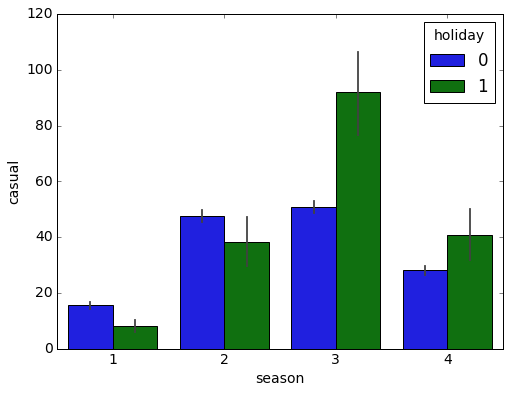

In [17]:
sns.barplot(x="season", y="casual", hue="holiday", data=train)

**Inference**

holiday has very less impact on total rent. Season has more influence.

Casual people prefer renting bike more on holiday especially in fall and winter. In contrast, registered people rent mostly on working days.

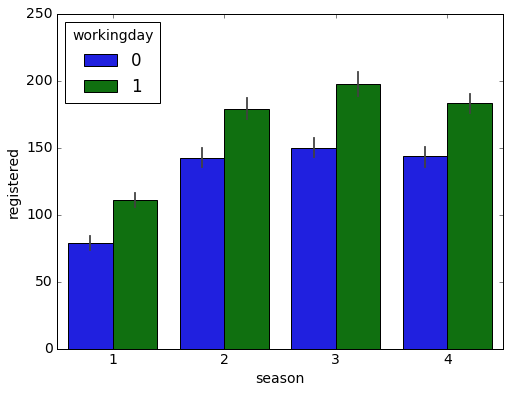

In [18]:
sns.barplot(x="season", y="registered", hue="workingday", data=train);

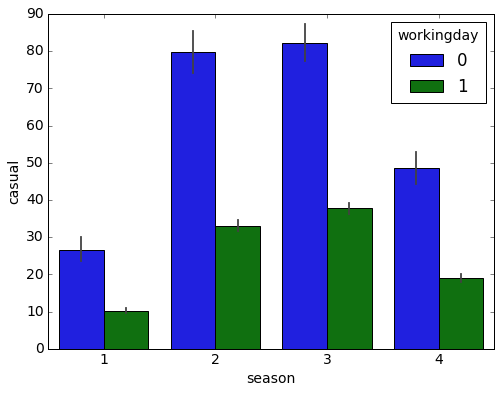

In [19]:
sns.barplot(x="season", y="casual", hue="workingday", data=train);

Workingday is also having less impact as with holiday. Let try to extract a new attribute 'weekend' from holiday and workingday.
weekend = !workingday & !holiday in feature extraction step.

Again, more casual people on non-working day.

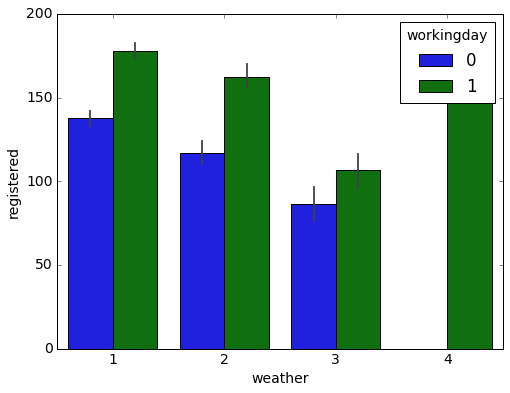

In [20]:
sns.barplot(x="weather", y="registered", hue="workingday", data=train);

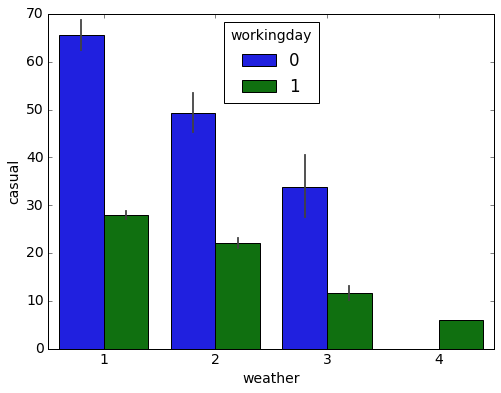

In [21]:
sns.barplot(x="weather", y="casual", hue="workingday", data=train);

**Inference**

In case of not heavy rain no one rented cycle if it is not a workingday. It might be people preferred to stay at home.

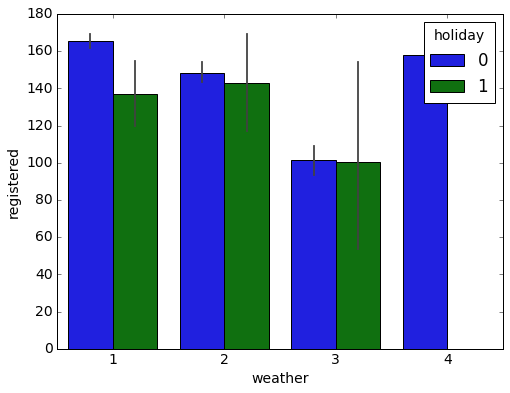

In [22]:
sns.barplot(x="weather", y="registered", hue="holiday", data=train);

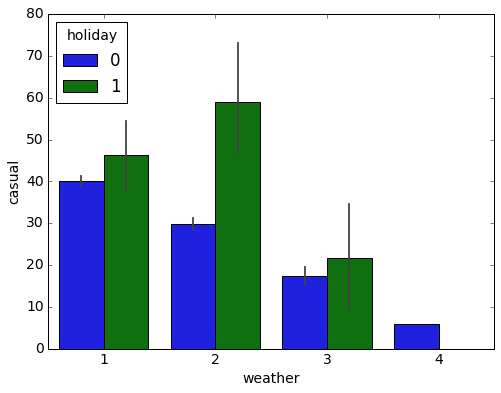

In [23]:
sns.barplot(x="weather", y="casual", hue="holiday", data=train);

**Inference**

No one rented a cycle when the weather is raining and it's a holiday. People preferred staying at home.

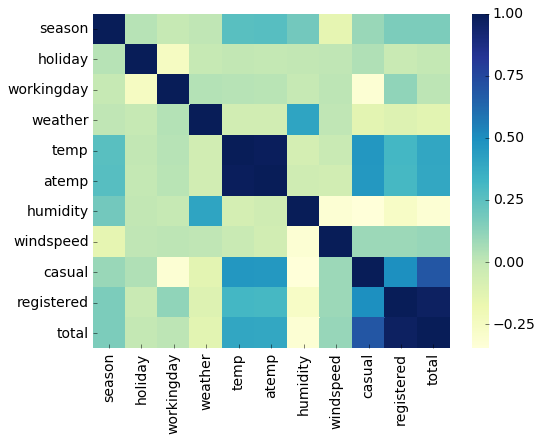

In [24]:
# Let's plot corellation plot for attributes

sns.heatmap(train.corr(), cmap='YlGnBu')

**Feature Extraction**

1. Create weekend from holiday as working day. After that lets see the impact of that on total rented.

In [25]:
def feature_extraction_weekend(df):
    df['weekend'] = (df['holiday'] == 0) & (df['workingday'] == 0)
    return df

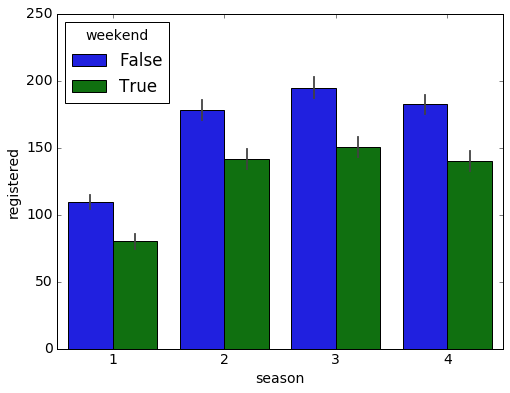

In [27]:
train = feature_extraction_weekend(train)

# see visualization based on weekend

sns.barplot(x="season", y="registered", hue="weekend", data=train);

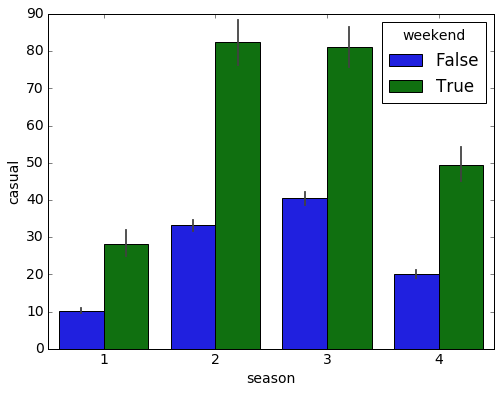

In [28]:
sns.barplot(x="season", y="casual", hue="weekend", data=train);

In [29]:
# Feature Extraction

def feature_selection_season(df):
    season_dummies = pd.get_dummies(df.season, prefix='season')
    season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)
    return pd.concat([df, season_dummies], axis=1)

def feature_selection_time(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hours'] = df['datetime'].apply(lambda x: x.hour)
    # Make dummies
    dummies_hour = pd.get_dummies(df.hours, prefix='hour')
    dummies_hour.drop(dummies_hour.columns[0], axis=1, inplace=True)
    return pd.concat([df, dummies_hour], axis=1)
    
    
def feature_selection_month(df):
    df['months'] = df['datetime'].apply(lambda x: x.month)
    # Make dummies
    dummies_month = pd.get_dummies(df.months, prefix='month')
    dummies_month.drop(dummies_month.columns[0], axis=1, inplace=True)
    return pd.concat([df, dummies_month], axis=1)

def feature_selection_year(df):
    df['year'] = df['datetime'].apply(lambda x: x.year)
    return df
    
def feature_selection_dayTime(df):
    df['daytime'] = ((df.hours > 6) & (df.hours < 21)).astype(int)
    return df

In [30]:
train = feature_selection_season(train)
train = feature_selection_time(train)
train = feature_selection_month(train)
train = feature_selection_dayTime(train)
train = feature_selection_year(train)
#train = feature_extraction_weekend(train)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,daytime,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011


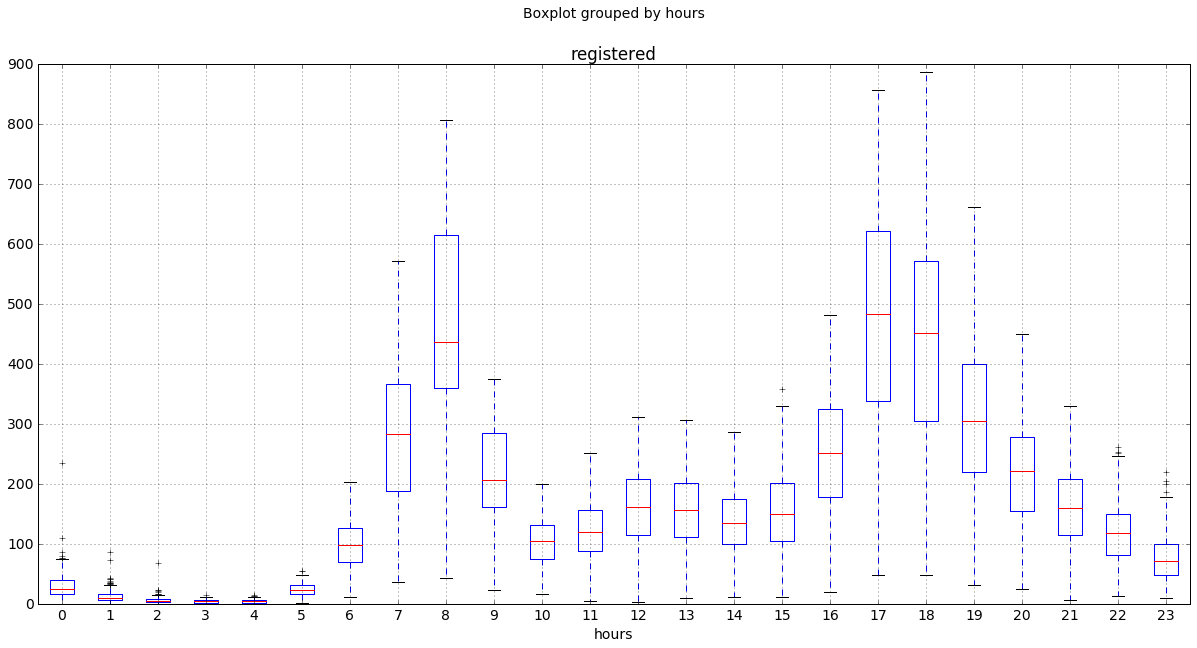

In [32]:
# Visualiation based on extracted features.
# Hour and total

train[train['workingday'] == 1].boxplot(column='registered', by='hours', figsize=(20,10))

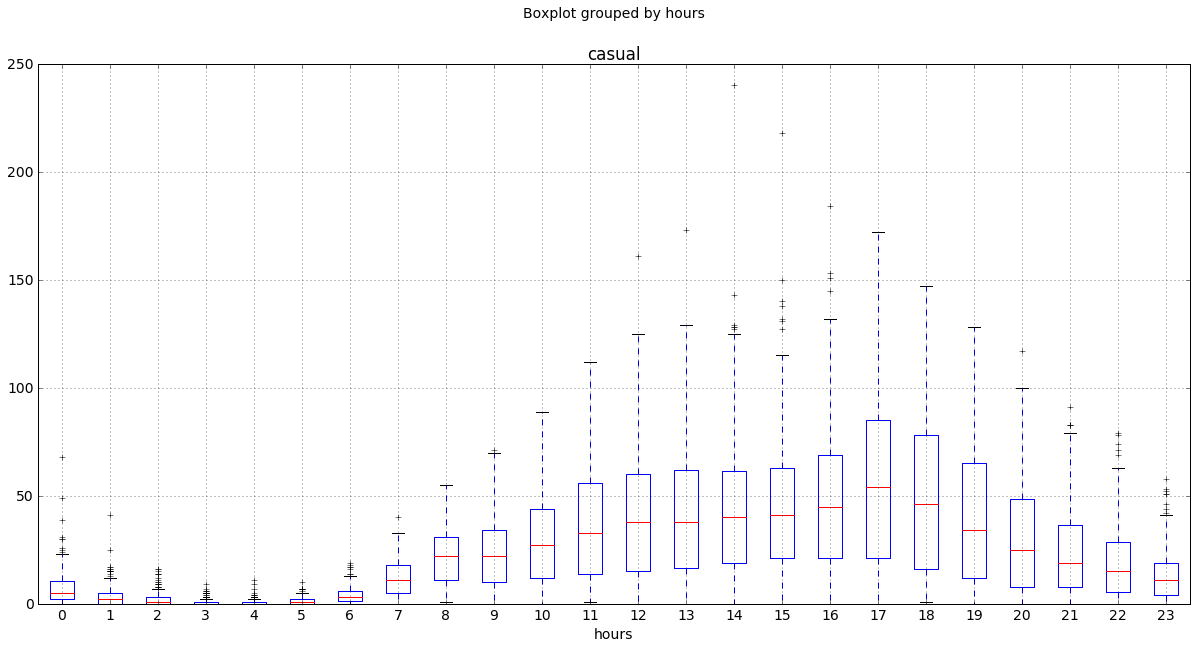

In [33]:
train[train['workingday'] == 1].boxplot(column='casual', by='hours', figsize=(20,10))

**Inference**

Cycle renting is more around 7 to 8 and again at 5 to 6. This time matches with start of working time and school going time. lets plot it with hue of not working days.

The people who rent cycle on working days are mostly registered. Very less casual people rented bike on working day.

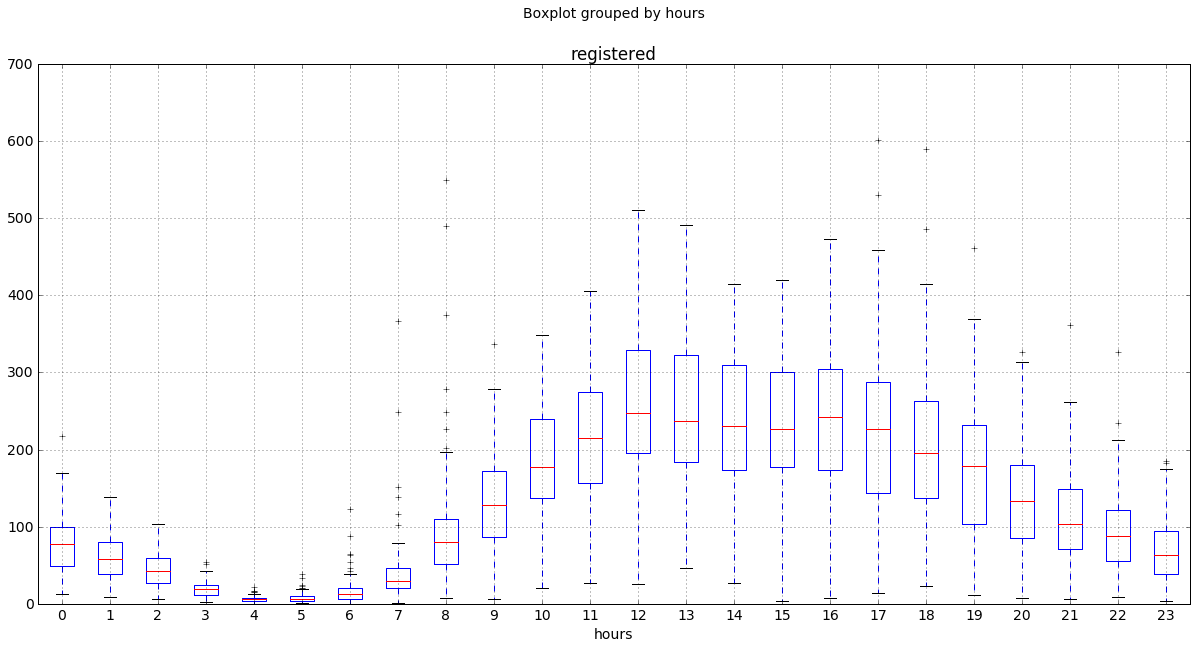

In [34]:
train[train['workingday'] == 0].boxplot(column='registered', by='hours', figsize=(20,10))

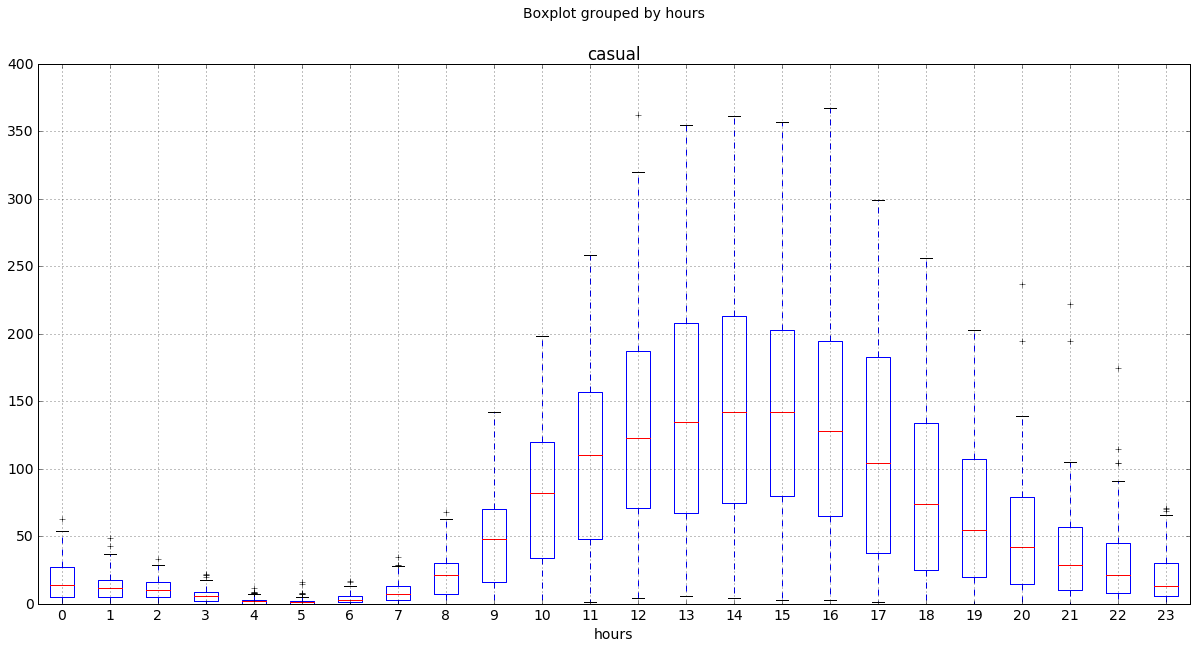

In [35]:
train[train['workingday'] == 0].boxplot(column='casual', by='hours', figsize=(20,10))

**Inference**

On not a working day it seems people start late. This is completely in contrast with pattern on working day. On non-working day people prefer renting bike around mid-day, around 12 to 3.

Also number or casual people renting bike on non-working day is more than registered users.

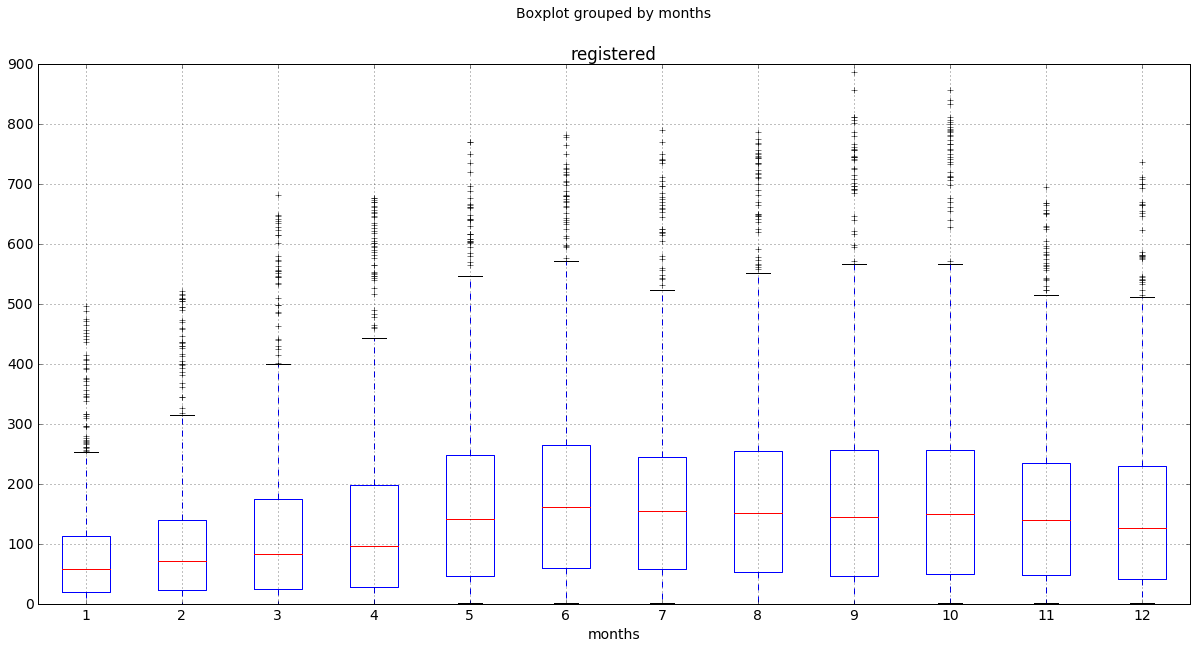

In [36]:
# Month and total

train.boxplot(column='registered', by='months', figsize=(20,10))

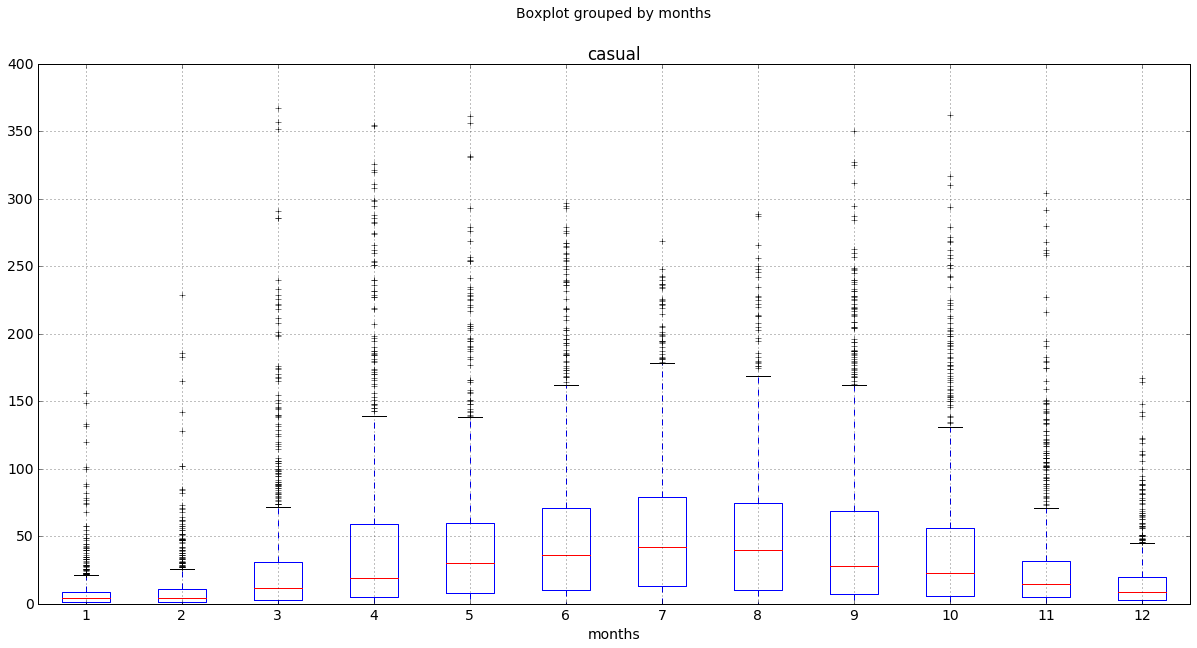

In [37]:
train.boxplot(column='casual', by='months', figsize=(20,10))

**Inference**

More rental in June, July. And less in Jan, Feb. 

In [38]:
# Define RMSE error. Used on Kaggle for scoring

def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [42]:
# Drop not needed column - casual','registered','total', 'datetime', 'season', 'hours'

feature_cols = ['casual','registered','total', 'datetime', 'season', 'hours', 'months', 'weekend'] 
y_train_registered = train.registered
y_train_casual = train.casual
x_train = train.drop(feature_cols, axis=1)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 46 columns):
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
season_2      10886 non-null float64
season_3      10886 non-null float64
season_4      10886 non-null float64
hour_1        10886 non-null float64
hour_2        10886 non-null float64
hour_3        10886 non-null float64
hour_4        10886 non-null float64
hour_5        10886 non-null float64
hour_6        10886 non-null float64
hour_7        10886 non-null float64
hour_8        10886 non-null float64
hour_9        10886 non-null float64
hour_10       10886 non-null float64
hour_11       10886 non-null float64
hour_12       10886 non-null float64
hour_13       10886 non-null float64
hour_14       10886 non-null float64
hour_15    

In [43]:
# Transform test data

x_test = feature_selection_season(test)
x_test = feature_selection_time(x_test)
x_test = feature_selection_month(x_test)
x_test = feature_selection_dayTime(x_test)
x_test = feature_selection_year(x_test)
#x_test = feature_extraction_weekend(x_test)

test_feature_cols = ['datetime', 'season', 'hours', 'months'] 
x_test = x_test.drop(test_feature_cols, axis=1)

x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 46 columns):
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
season_2      6493 non-null float64
season_3      6493 non-null float64
season_4      6493 non-null float64
hour_1        6493 non-null float64
hour_2        6493 non-null float64
hour_3        6493 non-null float64
hour_4        6493 non-null float64
hour_5        6493 non-null float64
hour_6        6493 non-null float64
hour_7        6493 non-null float64
hour_8        6493 non-null float64
hour_9        6493 non-null float64
hour_10       6493 non-null float64
hour_11       6493 non-null float64
hour_12       6493 non-null float64
hour_13       6493 non-null float64
hour_14       6493 non-null float64
hour_15       6493 non-null float64
h

In [44]:
# Linear Model -  Linear Regression

def train_test_linear(X, y):
    X_1, X_2, y_1, y_2 = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_1, y_1)
    y_pred = linreg.predict(X_2)
    return linreg, rmsle(y_2, y_pred)

In [47]:
linear_model_registered, rmse_linear_registered = train_test_linear(x_train, y_train_registered)
linear_model_casual, rmse_linear_casual = train_test_linear(x_train, y_train_casual)


print rmse_linear_registered
print rmse_linear_casual

1.12688496626
1.1006744561


In [50]:
#Submission

def submission_file(y_predict, filename):
    submission = pd.DataFrame({
            "count": [max(0, x) for x in y_predict],
            "datetime": test["datetime"]
        })

    submission.to_csv(filename, index=False)

In [51]:
linear_prediction_registered = linear_model_registered.predict(x_test)
linear_prediction_casual = linear_model_casual.predict(x_test)

linear_prediction_total = linear_prediction_registered + linear_prediction_casual
submission_file(linear_prediction_total, "linear_regression_submission.csv")

After submission 

- Score - 

Is the model overfitting ? Check the coefficients.

In [56]:
print "Coefficients for registered"

print linear_model_registered.coef_
print linear_model_registered.intercept_


print "Coefficients for casual"

print linear_model_casual.coef_
print linear_model_casual.intercept_

Coefficients for registered
[  8.82092044e+00   3.96374319e+01  -2.01941868e+01   6.56651454e-01
   2.14226769e+00  -4.83398739e-01  -3.00696689e-01   1.00886022e+11
   6.84164364e+11   5.55204155e+11  -1.91325316e+01  -2.61400319e+01
  -3.41338901e+01  -3.80752353e+01  -2.04945959e+01   3.29074015e+01
   6.19685770e+10   6.19685771e+10   6.19685770e+10   6.19685769e+10
   6.19685769e+10   6.19685770e+10   6.19685770e+10   6.19685769e+10
   6.19685769e+10   6.19685770e+10   6.19685772e+10   6.19685771e+10
   6.19685770e+10   6.19685770e+10   9.30709733e+01   6.01361984e+01
   2.69635887e+01   1.40447538e+01   1.61107389e+01  -1.00886021e+11
  -1.00886021e+11  -1.00886021e+11  -6.84164364e+11  -6.84164364e+11
  -6.84164364e+11  -5.55204155e+11  -5.55204155e+11  -5.55204155e+11
  -6.19685768e+10   7.59640949e+01]
-152822.956494
Coefficients for casual
[ -1.10493420e+01  -3.61891086e+01  -4.00131620e+00   1.50433635e+00
   4.44855333e-01  -3.44050070e-01  -3.02575564e-01   6.13754050e+11


Yes !!! The coefficent is too high. Let's try
1. Feature Selection - Will use in next notebook
2. Ridge Regression - used in next section
3. Lasso Regression - used in next section

In [57]:
# Ridge Regression with L2 regularization.

def train_test_ridge(X, y, alpha):
    X_1, X_2, y_1, y_2 = train_test_split(X, y, random_state=123)
    linreg = Ridge(alpha)
    linreg.fit(X_1, y_1)
    y_pred = linreg.predict(X_2)
    return linreg, rmsle(y_2, y_pred)

In [59]:
alpha_values = np.arange(0.1,1.0,0.1)

ridge_models_registered = {}
for alpha in alpha_values:
    ridge_models_registered[alpha], value = train_test_ridge(x_train, y_train_registered, alpha)
    print alpha, value

0.1 1.12618235513
0.2 1.12560670751
0.3 1.12511533978
0.4 1.12468569691
0.5 1.13246125509
0.6 1.12867468415
0.7 1.12715576389
0.8 1.12615457721
0.9 1.12539130225


In [60]:
alpha_values = np.arange(0.1,1.0,0.1)

ridge_models_casual = {}
for alpha in alpha_values:
    ridge_models_casual[alpha], value = train_test_ridge(x_train, y_train_casual, alpha)
    print alpha, value

0.1 1.10054751439
0.2 1.10062927173
0.3 1.10751407256
0.4 1.10596870413
0.5 1.10527960029
0.6 1.1048889456
0.7 1.10465429265
0.8 1.10451948949
0.9 1.10445797541


In [62]:
print ridge_models_registered.keys()

print ridge_models_registered[0.4].coef_
print ridge_models_registered[0.4].intercept_

[0.5, 0.20000000000000001, 0.40000000000000002, 0.80000000000000004, 0.30000000000000004, 0.59999999999999998, 0.10000000000000001, 0.90000000000000002, 0.70000000000000007]
[   8.76902463   39.62286848  -20.1873147     0.66882706    2.14088466
   -0.48362463   -0.30048607   35.69790481   34.65456644   54.66171966
  -19.37783565  -26.37299174  -34.35310501  -38.29115912  -20.72677264
   32.61330641    2.58486067  142.83349634  -16.62196084  -83.20555026
  -66.10688783  -33.26383018  -40.7152769   -56.22181394  -50.75234146
   14.47188937  173.95246068  146.93235779   49.9433961   -23.69353102
   92.67302454   59.77881088   26.65680409   13.91740129   15.94155104
   -4.5717052    19.58837935   20.68123067   -2.40632908    8.11384047
   28.94705505   22.89896495   13.52891494   18.23383976  160.1372685
   75.93709096]
-152768.346591


Great the values are now reasonable. 

Submission - 

In [64]:
# Lasso Regression
def train_test_lasso(X, y, alpha):
    X_1, X_2, y_1, y_2 = train_test_split(X, y, random_state=123)
    linreg = Lasso(alpha)
    linreg.fit(X_1, y_1)
    y_pred = linreg.predict(X_2)
    return linreg, rmsle(y_2, y_pred)

In [72]:
alpha_values = np.arange(0.1,1.0,0.1)

lasso_models_registered = {}
for alpha in alpha_values:
    lasso_models_registered[alpha], value = train_test_lasso(x_train, y_train_registered, alpha)
    print alpha, value

0.1 1.11967903056
0.2 1.1282381912
0.3 1.12930245612
0.4 1.12581936896
0.5 1.12630374345
0.6 1.14013731479
0.7 1.14224278052
0.8 1.13947419753
0.9 1.14618210008


In [73]:
alpha_values = np.arange(0.1,1.0,0.1)

lasso_models_casual = {}
for alpha in alpha_values:
    lasso_models_casual[alpha], value = train_test_lasso(x_train, y_train_casual, alpha)
    print alpha, value

0.1 1.11447238247
0.2 1.13446852408
0.3 1.15067836883
0.4 1.15776211245
0.5 1.1790773933
0.6 1.17173184212
0.7 1.18241876855
0.8 1.17063760477
0.9 1.16945411645


In [76]:
lasso_prediction = lasso_models_registered[0.1].predict(x_test) + lasso_models_casual[0.1].predict(x_test)
submission_file(lasso_prediction, "lasso_regression_submission.csv")

Lasso Submission - 

In [78]:
random_forest_model_registered = RandomForestRegressor()
random_forest_model_registered.fit(x_train, y_train_registered)


random_forest_model_casual = RandomForestRegressor()
random_forest_model_casual.fit(x_train, y_train_casual)


random_forest_prediction_registered = random_forest_model_registered.predict(x_test)
random_forest_prediction_casual = random_forest_model_casual.predict(x_test)

random_forest_prediction = random_forest_prediction_registered + random_forest_prediction_casual

submission_file(random_forest_prediction, "random_forest_regression_submission.csv")

Random Forest Submission- 